# ML Auto V28.ipynb

## Gyors link
[log](#log) [car](#car) [run](#run) [zip](#zip)

**ToDo:**

Különböző teszteket fogok végezni a pályával és a Neurális háló beállításával, hogy lássam milyen hatással van a futásra.



# Korábbi PNG fájlok törlése

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import os
import sys
import pickle
import importlib

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')


In [3]:
!rm MLPPlot.py
!rm debils.py
!rm environments.py
!rm *.py.*
!rm *.pkl

rm: cannot remove '*.pkl': No such file or directory


In [17]:
%%capture
!rm MLPPlot.py
!rm environments.py
!rm plotters.py
!rm debils.py
!rm cars.py
!rm dev.py

!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/debils.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/environments.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/plotters.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/storages.py
# !wget --no-cache --backups=1 https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py
!wget --no-cache --no-clobber https://raw.githubusercontent.com/JoDeMiro/TMP/main/dev.py

!curl -H 'Pragma: no-cache' https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py --output cars.py


In [5]:
import subprocess

result = subprocess.run(["wget", "--no-cache",
                         "--backups=1",
                         "https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py"],
                        stderr=subprocess.PIPE, stdout=subprocess.PIPE)
print(result.stderr.decode("utf-8"))

--2022-03-24 11:35:37--  https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99687 (97K) [text/plain]
Saving to: ‘cars.py’

     0K .......... .......... .......... .......... .......... 51% 9.84M 0s
    50K .......... .......... .......... .......... .......   100% 46.4M=0.006s

2022-03-24 11:35:37 (16.0 MB/s) - ‘cars.py’ saved [99687/99687]




In [18]:
import importlib

import MLPPlot
from MLPPlot import DrawNN

from debils import Printer
from environments import Road
from plotters import PostPlotter, Plotter
from storages import Storage
from cars import TestCar, Car
import dev

<a name="log"></a> log [plt](#plt) [str](#str) [car](#car) [run](#run) [dev](#dev) [zip](#zip) [tst](#tst)

# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  1000
  		 minimum slope (descending) =  -1.2261300284166055
  		 maximum slope (ascending)  =   1.6235118304264233
# ----------------------------------------------------------------------------------------------------


(<Figure size 1872x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f55492e32e0>)

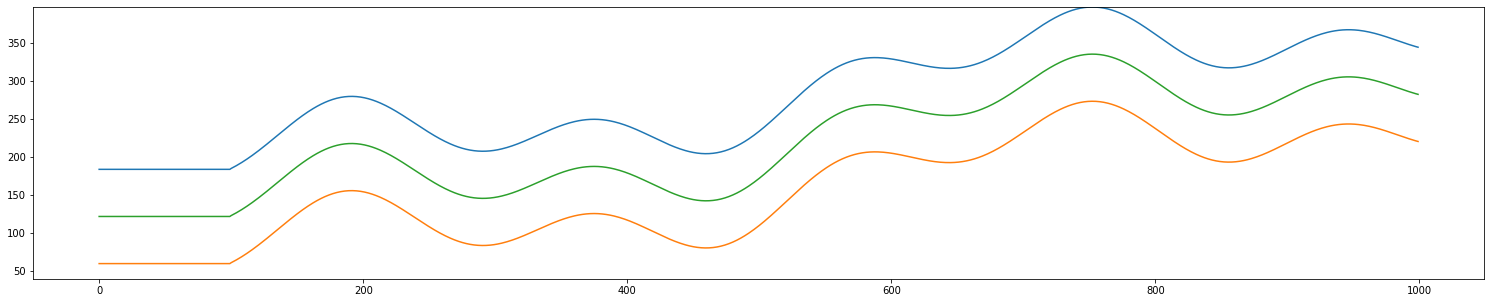

In [19]:
test_road = Road(wide = 124, length = 1000)

test_road.show(height=5)

# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  1000
  		 minimum slope (descending) =  -1.2261300284166055
  		 maximum slope (ascending)  =   1.6235118304264233
# ----------------------------------------------------------------------------------------------------


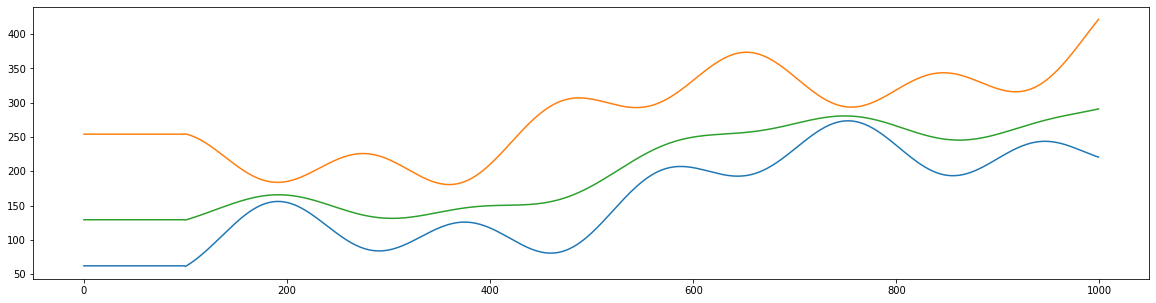

In [8]:
test_road = Road(wide = 124, length = 1000)

test_road.wizu()

In [9]:
_a = widgets.IntSlider(min=-10, max=50, step=1, value=41)
_b = widgets.FloatSlider(min=0.2, max=0.7, step=0.1, value=0.3)
_c = widgets.IntSlider(min=0, max=100, step=1, value=30)
_u = widgets.IntSlider(min=0, max=200, step=1, value=0)

In [10]:
interact(test_road.wizu, u = _u, v = 124, a=_a, b=_b, c=_c); # u = 91  n = 5

interactive(children=(IntSlider(value=0, description='u', max=200), IntSlider(value=124, description='v', max=…

<a name="car"></a> [log](#log) [plt](#plt) [str](#str) car [run](#run) [dev](#dev) [zip](#zip) [tst](#tst)

## Exp001
A felső út al van tolva az alsóhoz képest, de minden másban azonos,

Az út közepe a célfüggvény nem a két szélső közepe

# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  1200
  		 minimum slope (descending) =  -1.2261300284166055
  		 maximum slope (ascending)  =   1.946752164310226
# ----------------------------------------------------------------------------------------------------


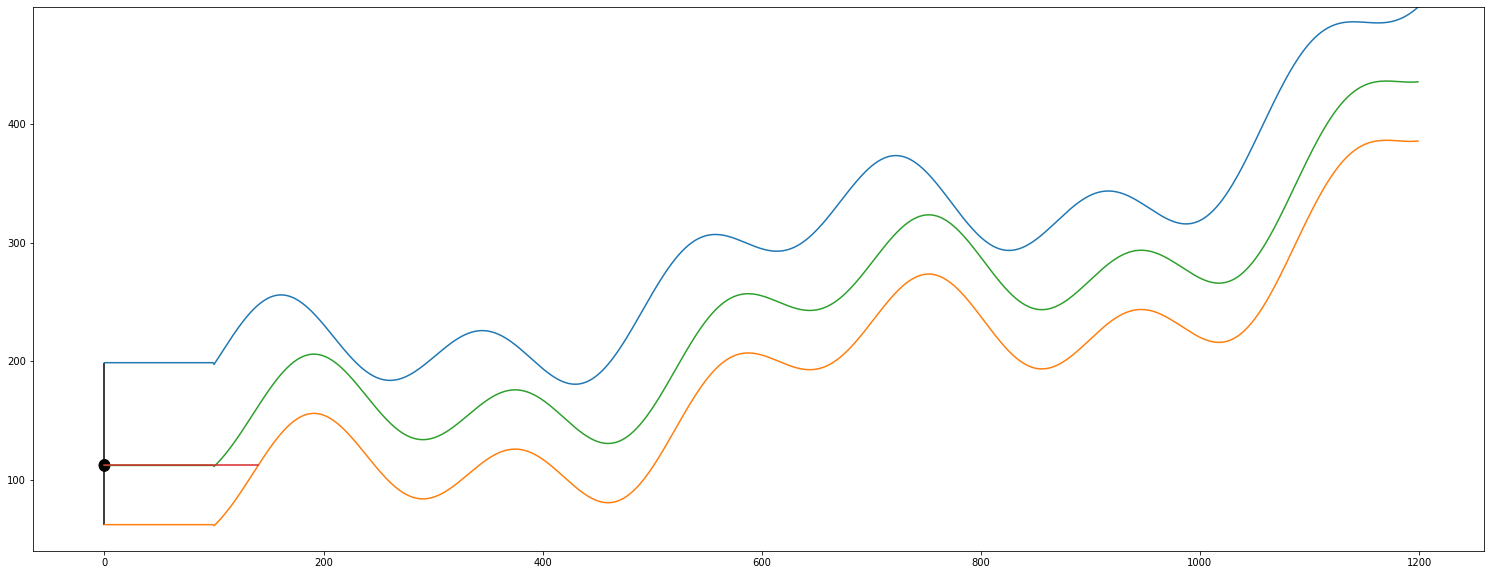

 --------------- plot --------------- 


In [11]:
road = Road(wide = 100, length = 1200, type = 99, v = 50, shift = 30)
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)

auto.calculate_distances()
auto.plot_history(1)

<a name="run"></a> [log](#log) [rod](#rod) [plt](#plt) [str](#str) [car](#car) run [dev](#dev) [zip](#zip) [tst](#tst)

In [12]:
auto.run(900, silent = True)

# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  891
 --------------- plot trace --------------- 
# i =  891
Iteration 294, loss = 0.00076616
Validation score: 0.981599
első if
---------------> self.y 261.07381028996195, self.road.wall_left[self.x] = 335.1884435180625, self.road.wall_right = 210.92747509432763
self.y új értéke   =  261.07381028996195
action             =  2
----------------- módosítás vége -----------------
# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  892
actual predicted_test =  [0.07276473]
actual self.y_distance[-1] =  -0.6924859964016719
actual predicted_test_inv =  [-0.47285639]
len(self.y_distance_predicted) =  291
len(self.y_distance_predicted_inv) =  291
# A run ciklus eleje ---------------------------------------------------------------------------------------------

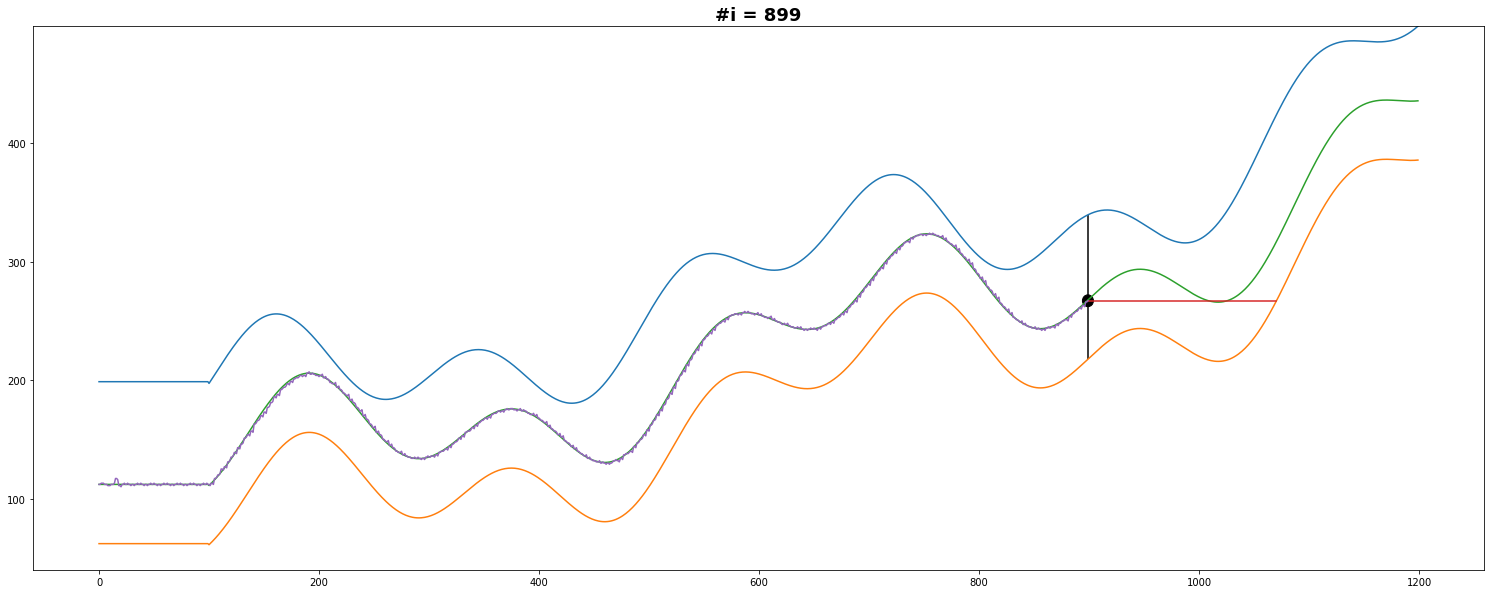

 --------------- plot --------------- 


In [13]:
auto.plot_history(1)

<a name="dev"></a> [log](#log) [plt](#plt) [str](#str) [car](#car) [run](#run) dev [zip](#zip) [tst](#tst)

# Dev

In [20]:
print('len = ', len(auto.mlp.coefs_))

print('type(auto.mlp.coef_[0]) = ', type(auto.mlp.coefs_[0]))
print('type(auto.mlp.coef_[1]) = ', type(auto.mlp.coefs_[1]))

print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[0].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[1].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[2].shape)

len =  3
type(auto.mlp.coef_[0]) =  <class 'numpy.ndarray'>
type(auto.mlp.coef_[1]) =  <class 'numpy.ndarray'>
auto.mlp.coef[].shape =  (3, 10)
auto.mlp.coef[].shape =  (10, 5)
auto.mlp.coef[].shape =  (5, 1)


In [21]:

# ugyen ezt meg kell csinálni az mlp modellre is (ott kicsit több súly van)

# aztán áttenni mindkettőt a plotter osztályba



885


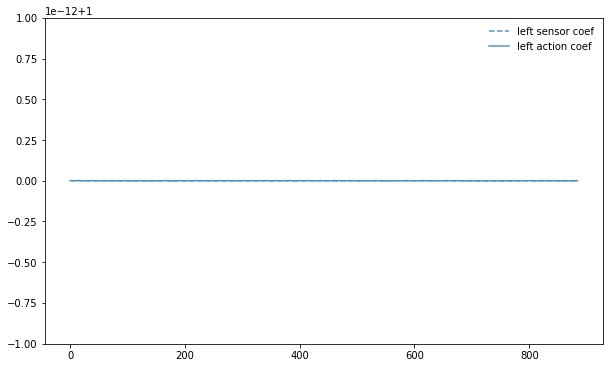

885


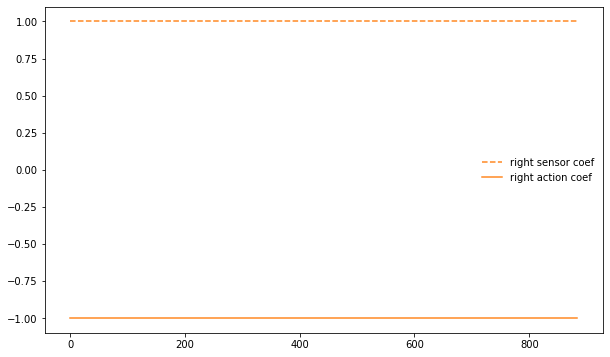

885


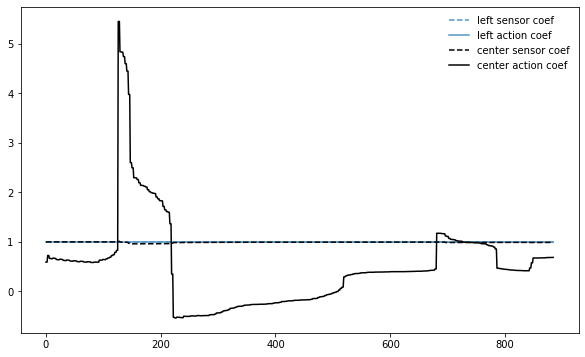

885


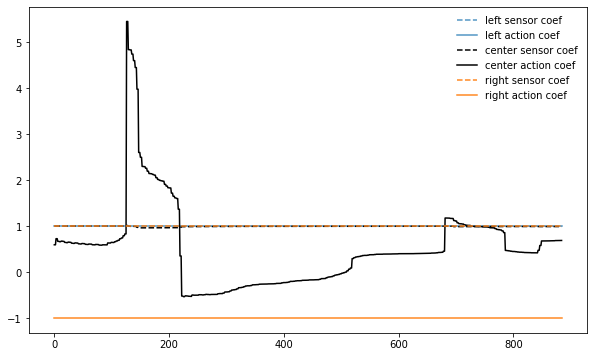

885


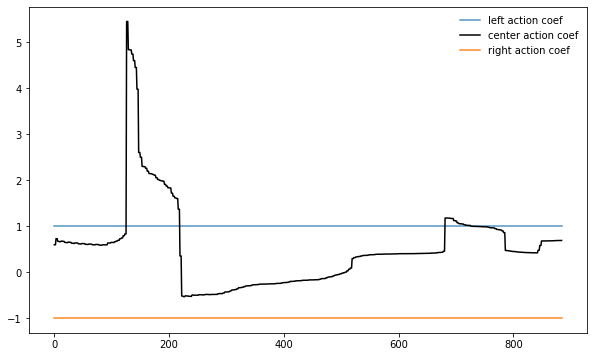

885


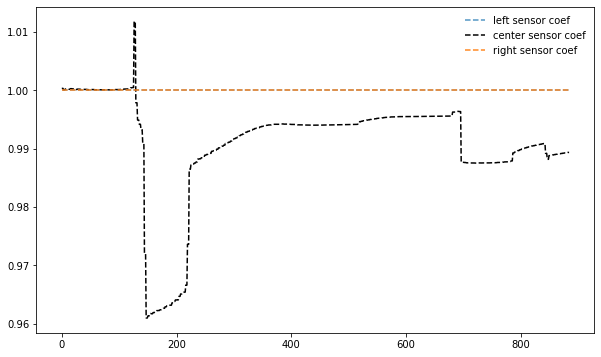

In [24]:
postPlotter = PostPlotter(auto)

postPlotter.plot_lr_weight(car = auto, flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['sensor'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['action'], flag = 1)


In [87]:
# Create rotated animation from still image - sensor_left, sensor_right vs y_distance

# Temporary disabled - flag = 0

from dev import *

for i in range(100):
  Plot3DVersion5(elevation = 10, azimuth = i, flag = 0, i=i)

[ 3 10  5  1]


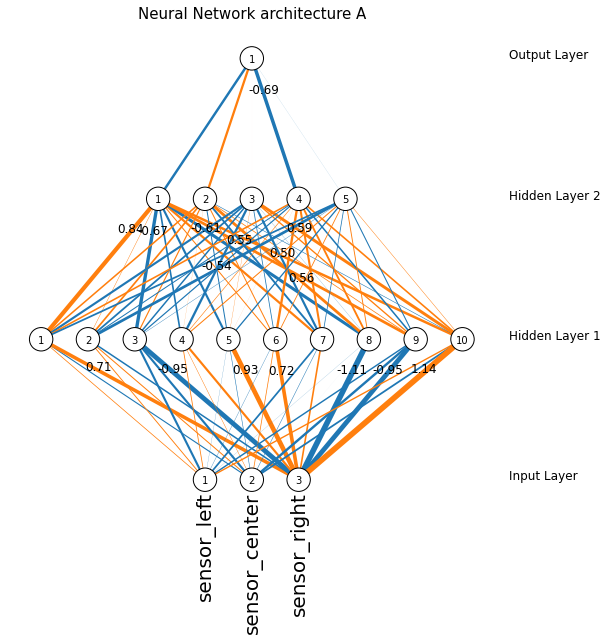

In [88]:
auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)

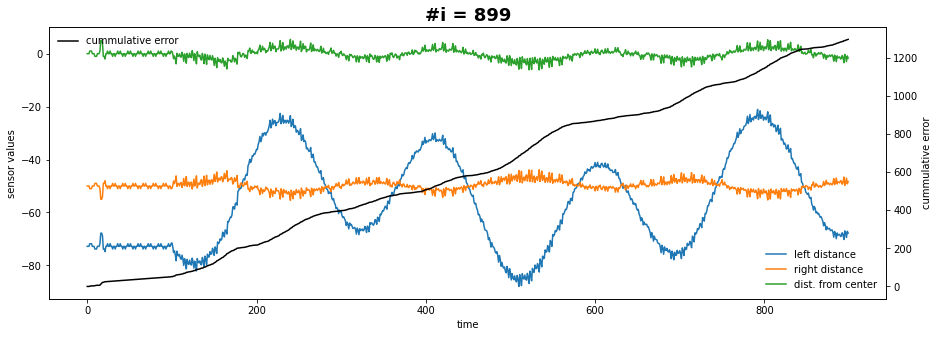

In [80]:
auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])

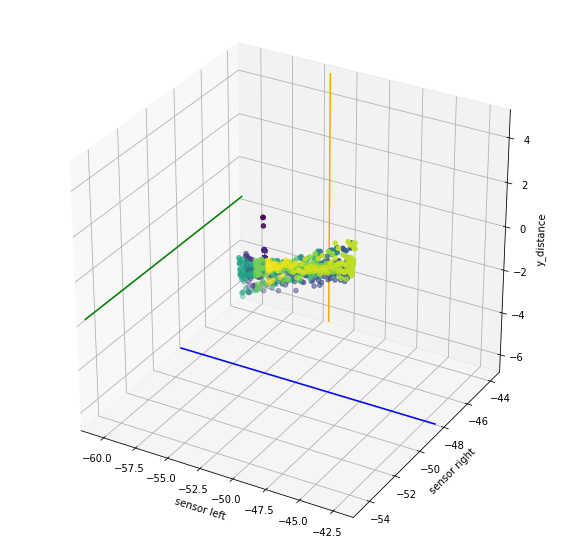

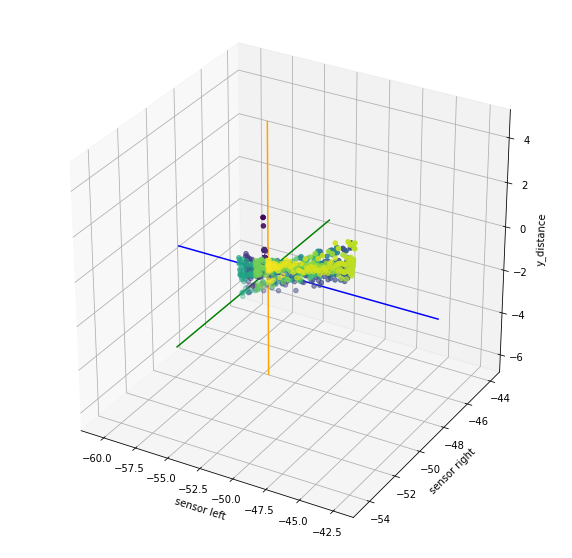

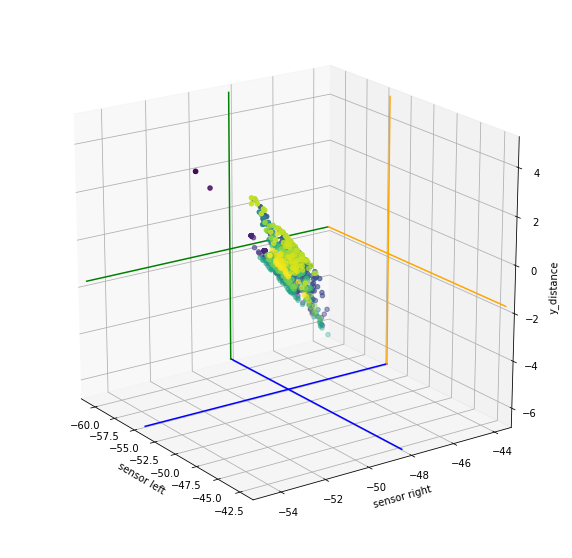

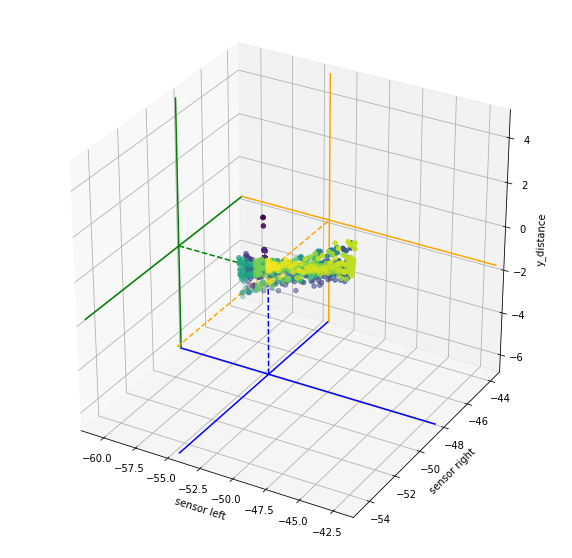

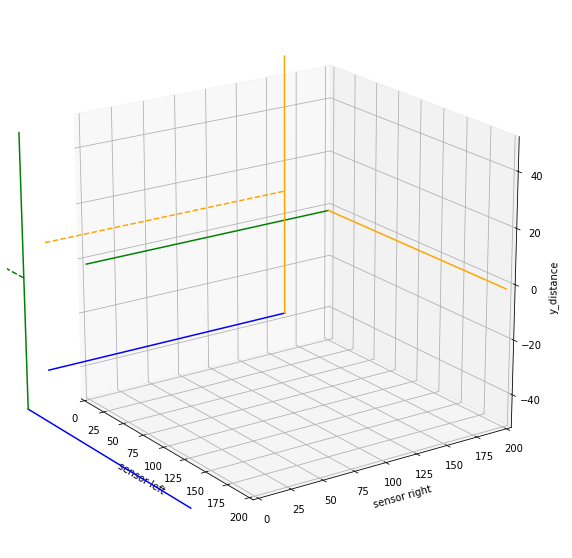

In [89]:
auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

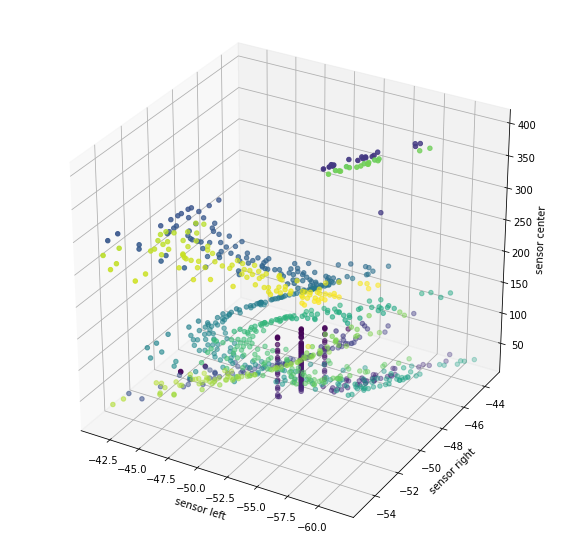

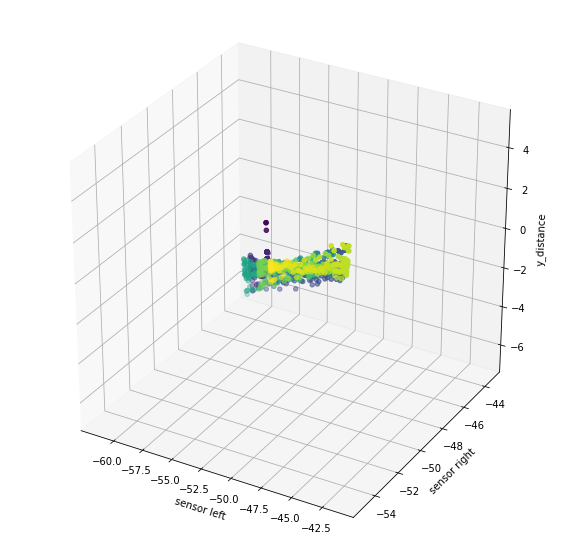

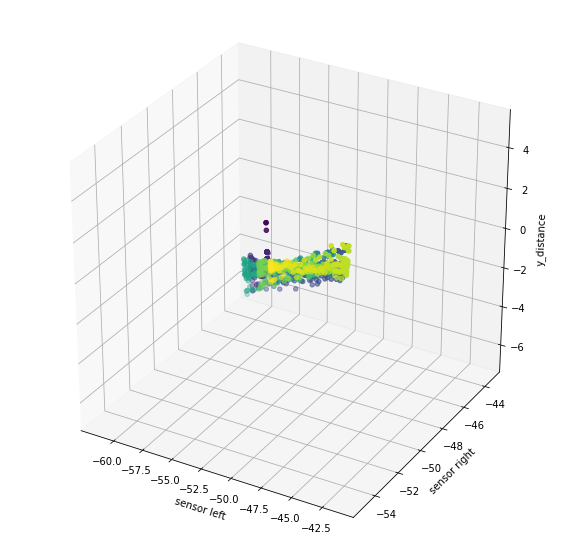

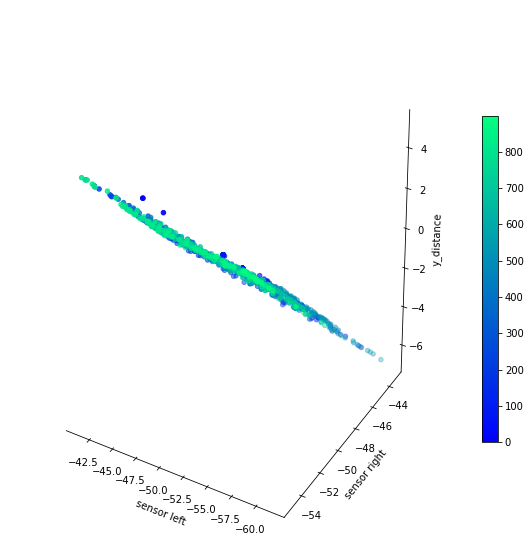

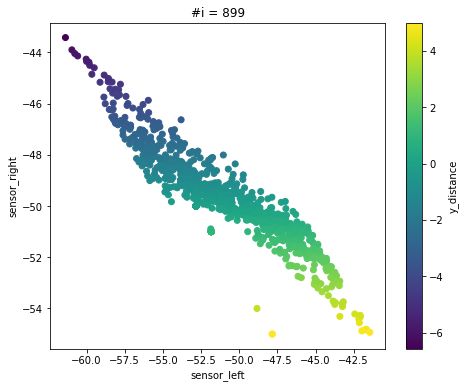

In [90]:
auto.plot_state_space_discover(1)

# PostPlotter

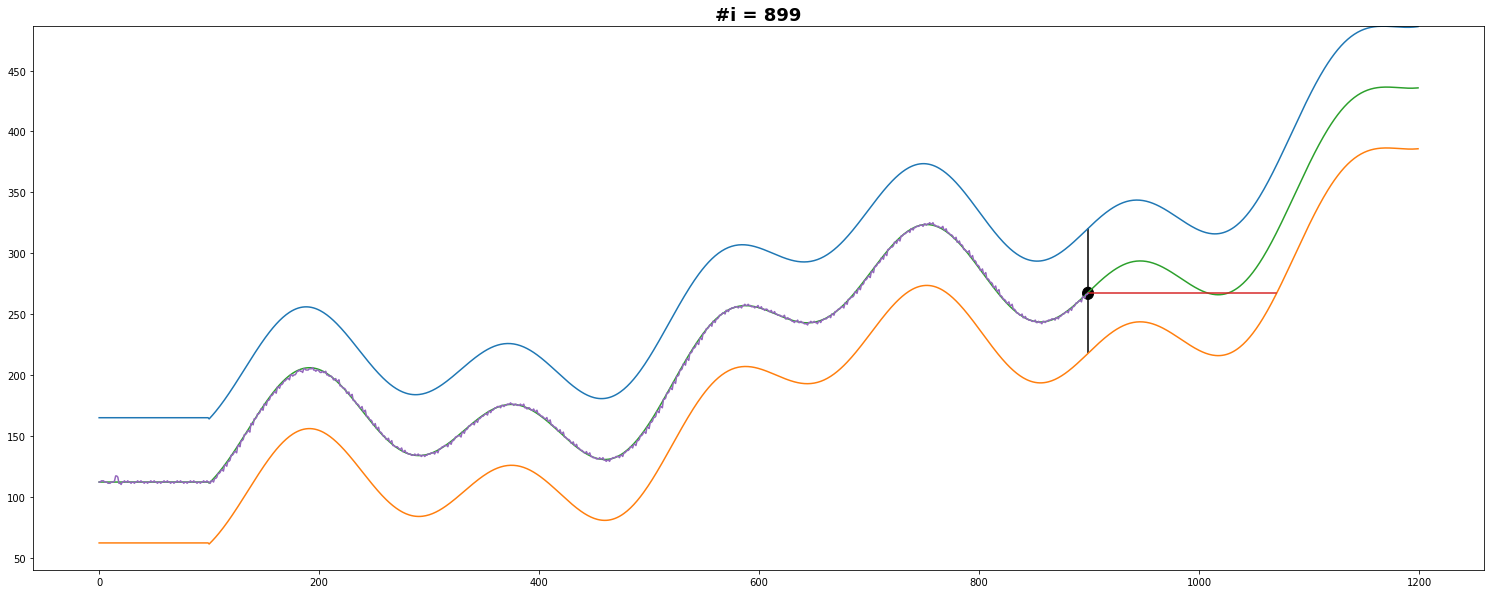

 --------------- plot --------------- 


In [91]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
auto.plot_history(1)

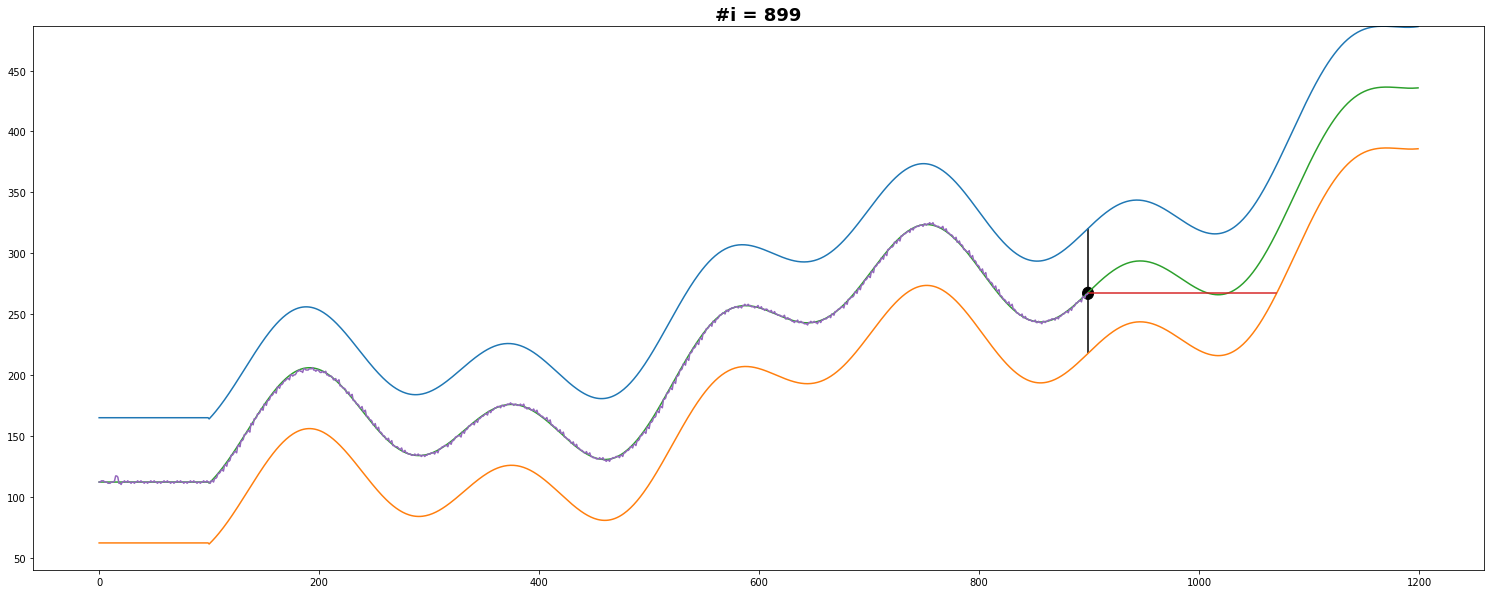

 --------------- plot --------------- 


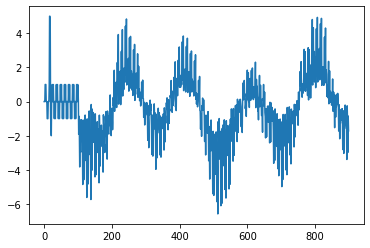

[ 3 10  5  1]


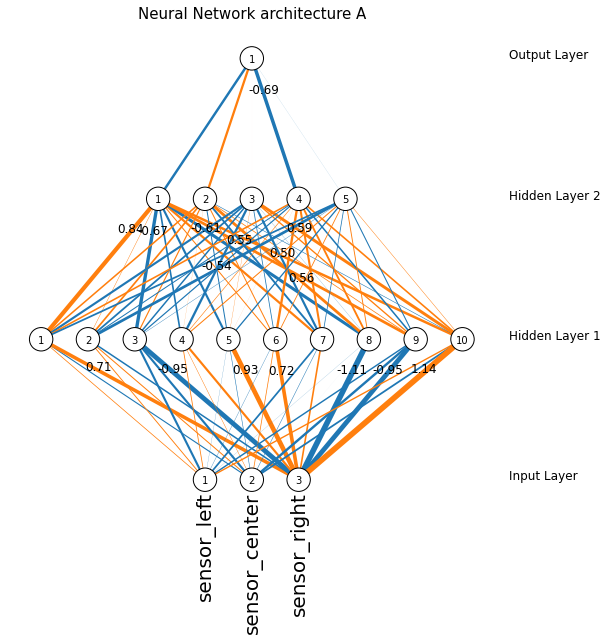

In [92]:
postPlotter = PostPlotter(auto)

postPlotter.plot_history(flag = 1)

postPlotter.plot_y_distance()

postPlotter.plot_mlp()


In [93]:
# csinálni egy animációt simán arra, hogy fix center érték mellett megtekeri a plotot

# csinálni arra is egy animációt, hogy fix nézőpont mellett végig iterál center 50-től 200-ig

In [94]:
# Create rotated animation from still image - sensor_left, sensor_right vs y_distance, predcition

# Temporary disabled - flag = 0

for i in range(100):
  postPlotter.plot_mlp_surface_prediction_v4(limit = True, flag = 0, resolution=100, transparency=0.8, cmap='Blues',
                                             center=100, elevation=10, azimuth = i, i = i)

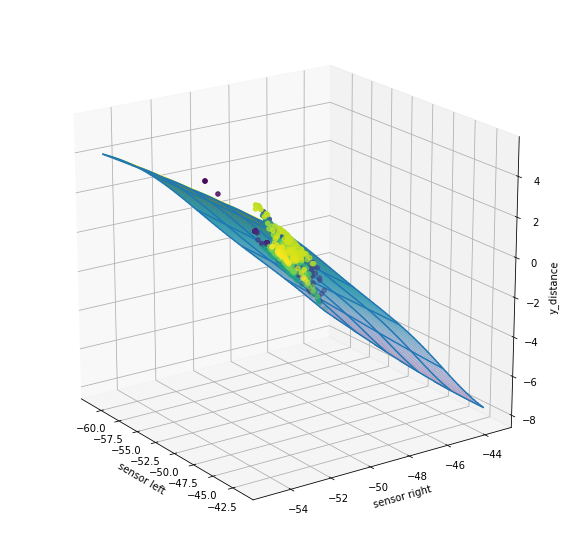

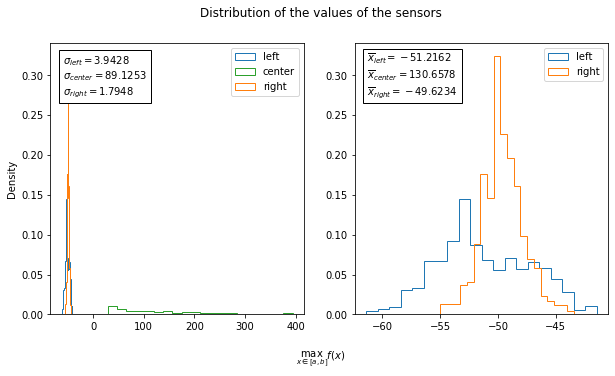

In [95]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

postPlotter = PostPlotter(auto)

postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=100)

postPlotter.plot_sensors_distibution(bins=20)

## TestCar

In [96]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=2000,
             random_state=1, shuffle=False, verbose=True, warm_start=True)

In [97]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)


# Test01
# kikapcsolom a középső szenzort pedig az is benne volt a tanulásban -> katasztrofa - eszerint a sensor_center igenis fontos szerepet játszott
#                                                                       abban a tanulásban amiben részt vett, így útolag nem nagyon éri meg
#                                                                       kikapcsolni -> ez azt is jelenti, hogyha meghíbásodik az gáz

# testAuto.sensor_center_enable = False


testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.run(900, cond = 4)               # 2222222222222

# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  891
take_action == True
------------------------------ IF i % 3 == 0 ------------------------------
=================== TAKE ACTION ===================
-------- ennyivel módosítom self.y értékét --------
self.y régi értéke =  260.07381028996195
self.y új értéke   =  261.07381028996195
action             =  1
----------------- módosítás vége -----------------
# A run ciklus vége ------------------------------------------------------------------------------------------------------------------------------------------
#   itt adom hozzás a self.y a self.y_history-hoz
#    self.y :
261.07381028996195
# 			 --------------- Summary ---------------
# 			 _summary_mlp_fit_was_taken         =  0
# 			 _summary_mlp_prediction_was_taken  =  0
# 			 _summary_mesterseges_mozgatas      =  0
# 			 _summary_action_were_taken         =  1
# 
# A run ciklus vég

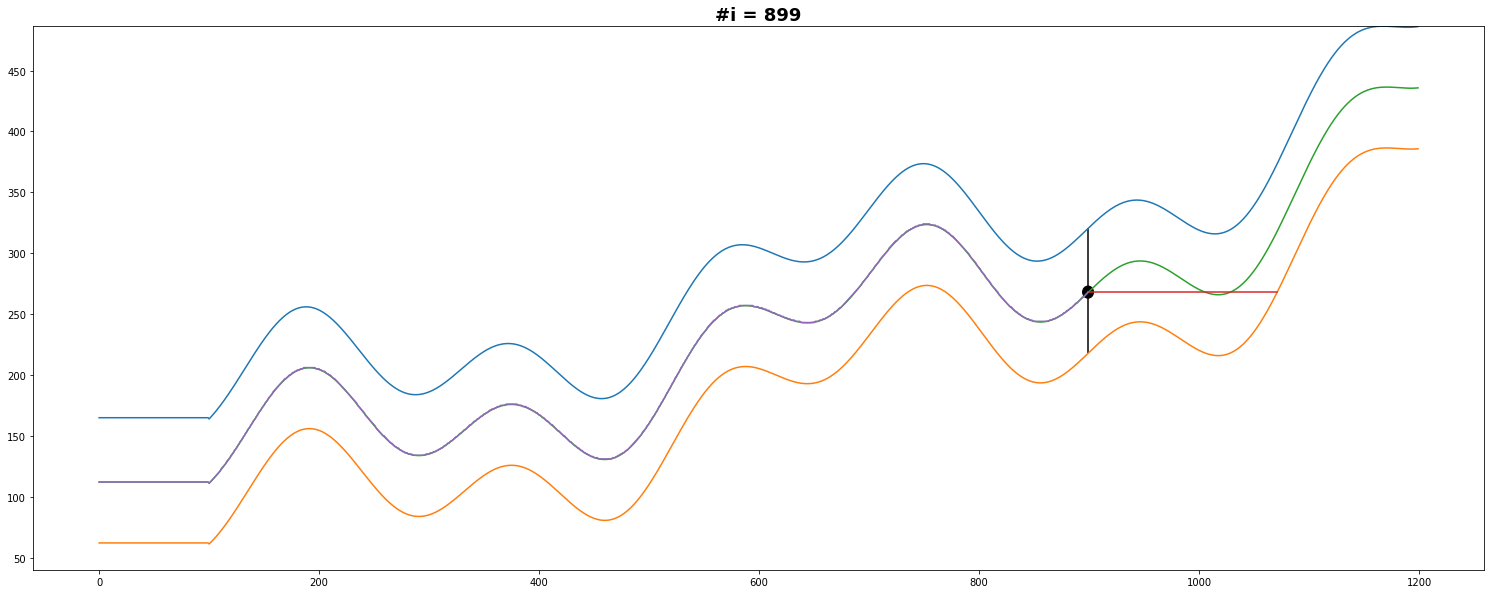

 --------------- plot --------------- 


In [98]:
testAuto.plot_history(1)

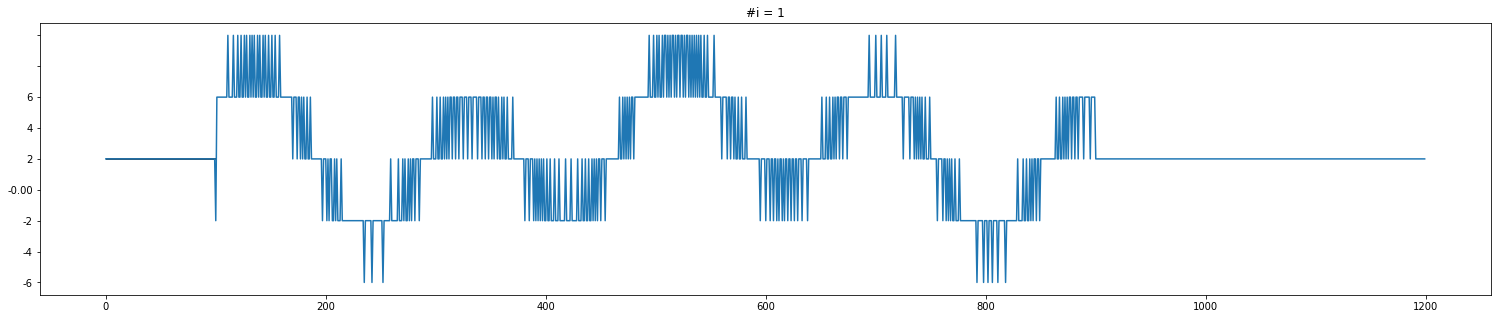

In [99]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

# Data

In [35]:
# Egyéként ha majd azt akarom csinálni, hogy menet közben nem akarok kiprintelni semmit
# de a végén szeretnék néhány képet csinálni a meglévő függvényekkel.
# Akkor nem kell újra írnom őket, hanem a Car ojektumon átálitom a <<flag>>
# értékeket és meghívom az adott plot() függvényt valahogy így

# auto.plot_investigation_flag = 1          # 0 - disable, 1 - plot, 2 - save, 3 - both

# auto.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)

# bár azért ezzel óvatósan, ki tudja mit tárolt el éppen az utolsó változó

<a name="zip"></a> [log](#log) [plt](#plt) [str](#str) [car](#car) [run](#run) [dev](#dev) zip [tst](#tst)

# Zip *.png to images.zip

In [36]:
%%capture
! zip -0 images.zip *.png

In [37]:
# Csak a Google Colabon használom

# from google.colab import files

# files.download('images.zip')

# Save to MP4

A gif exportot kivettem, ha kell a régebiek között X23 megtalálható.<br>
Felváltottam az MP4 Exporttal.

[log](#log) [plt](#plt) [car](#car) [run](#run) [dev](#dev) [zip](#zip)

In [38]:
import os
import glob

def create_animated_mp4(filter = 'history*.png', prefix = 'ani_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  # print('output = ', output)
  os.system('rm ' + output)
  if( len(glob.glob(filter)) > 0 ):
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec mpeg4 -y ' + output)
    os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)

    print('ok')

    # rossz egyenként letöltögetni őket, ugyhogy inkább be zippelem és egyben letöltöm
    # files.download(output)
  else:
    # print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')
    print('skipped')
    pass

In [39]:
create_animated_mp4('history*.png', 'ani_', framerate=10)

create_animated_mp4('y_move*.png', framerate=10)

create_animated_mp4('trace*.png', framerate=10)

skipped
skipped
skipped


rm: cannot remove 'ani_history.mp4': No such file or directory
rm: cannot remove 'ani_y_move.mp4': No such file or directory
rm: cannot remove 'ani_trace.mp4': No such file or directory


In [40]:
create_animated_mp4('sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorCenter_vs_yDistance_v1*.png', framerate=2)

create_animated_mp4('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v2*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRight_vs_yDistance_v1*.png', framerate=2)

create_animated_mp4('state_space_discover_LeftRightCenter_3D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_3D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_2D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_WhitoutBorder*.png', framerate=10)

create_animated_mp4('yDistance_vs_yDistance_predicted_type0*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type1*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type2*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type3*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type4*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type5*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_typeWrong*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_bw*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_col*.png', framerate=2)



create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v1*.png', framerate=10)

create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v2*.png', framerate=10)

create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v3*.png', framerate=10)

create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v4*.png', framerate=10)

create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v5*.png', framerate=10)



create_animated_mp4('timeline_sensors_v1*.png', framerate=10)


create_animated_mp4('ANN_*.png', framerate=10)


skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
ok


rm: cannot remove 'ani_sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1.mp4': No such file or directory
rm: cannot remove 'ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1.mp4': No such file or directory
rm: cannot remove 'ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2.mp4': No such file or directory
rm: cannot remove 'ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3.mp4': No such file or directory
rm: cannot remove 'ani_sensorCenter_vs_yDistance_v1.mp4': No such file or directory
rm: cannot remove 'ani_sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1.mp4': No such file or directory
rm: cannot remove 'ani_sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1.mp4': No such file or directory
rm: cannot remove 'ani_sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3.mp4': No such file or directory
rm: cannot remove 'ani_sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1.mp4': No such file or directory
rm: cannot remove 'ani_sen

In [41]:
create_animated_mp4('Plot3D*.png', framerate=10)

create_animated_mp4('PostPlotter_3D_MLP_Prediction*.png', framerate=10)

skipped
skipped


rm: cannot remove 'ani_Plot3D.mp4': No such file or directory
rm: cannot remove 'ani_PostPlotter_3D_MLP_Prediction.mp4': No such file or directory


In [42]:
%%capture
! zip -0 ani.zip *.mp4

In [43]:
# Csak a Google Colabon használom

# files.download('ani.zip')

In [44]:
# !rm *.png *.mp4

In [45]:
# !unzip images.zip

<a name="tst"></a> [log](#log) [plt](#plt) [str](#str) [car](#car) [run](#run) [dev](#dev) [zip](#zip) tst

# Test Auto

In [46]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni




MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=2000,
             random_state=1, shuffle=False, verbose=True, warm_start=True)

In [47]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# road = Road(wide = 100, length = 3000)


testRoad = road

# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
testAuto = TestCar(testRoad, plotter, storage, printer)

testAuto.calculate_distances()
testAuto.plot_history(1)

testAuto.run(900)

# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  891
# A run ciklus vége ------------------------------------------------------------------------------------------------------------------------------------------
#   itt adom hozzás a self.y a self.y_history-hoz
#    self.y :
145.72926300588156
# 			 --------------- Summary ---------------
# 			 _summary_mlp_fit_was_taken         =  0
# 			 _summary_mlp_prediction_was_taken  =  0
# 			 _summary_mesterseges_mozgatas      =  0
# 			 _summary_action_were_taken         =  0
# 
# A run ciklus vége ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  892
take_action == True
------------------------------ IF i % 3 == 0 ---------------------

## Itt hasonlítom össze a testAuto futási eredményeit

By the way -> kis zavar lehet az erőben, hogy mikor melyik objektumon melyik metodust használom.

1. Car objektumnak vannak bizonyos plot funkcói.<br>
Főként azokat tettem ide amelyekből animációt akarok csinálni, vagy futás közben is akarom látni a kimenetüket.

2. Car objektum példányosításnál kap egy Plotter objektumot.<br>
Ennek az volt az elsődleges célja, hogy kivezessem a Car osztályból a Plot funkciókat.<br>
A Plotter osztály olyan faramucin lett megírva, hogy a metodusai és azok szignaturája elég változatos és specifikus. Tulajdonképpen itt is arról van szó, hogyha valamit menet közben és többször is ki akarok plottoltani, akkor annak a Car objektumban kell lennie.

3. PostPlotter osztály viszont egy Car objektumot kap és minden metodusa úgy van megírva, hogy a Car objektumból olvassa ki az adatokat. Ezzel a módszerrel a futás utáni eredményeket akartam megjeleníteni. 

> **Lényegében:** A Car vagy TestCar osztályba marha kényelmes plot fügvényeket tenni, csak nem célszerű. Mert fejlesztésnél akár hányszor átirom őket újra kell példányosítanom magát az objektumot és azzal együtt elveszik minden benne tárolt adat - Sajnos ez akkor sem lesz jobb ha kiszervezem ezeket a Plotter osztályba mert azt is Car és a TestCar osztály kapja meg. Erre van a PostPlotter osztály ami egy Car objektumot vár. Ha már jó és beállítottam mindent egy adott plot metoduson utána átrakhatom a Plotter osztályba, fejlesztés alatt viszont a PostPlotter osztályban van.

Végeredményben elég lenne a Plotter osztály és a másik ket megoldást (PostPlotter és hogy a Car objektumank vannak plot metodusai) ki kellene vezetni.

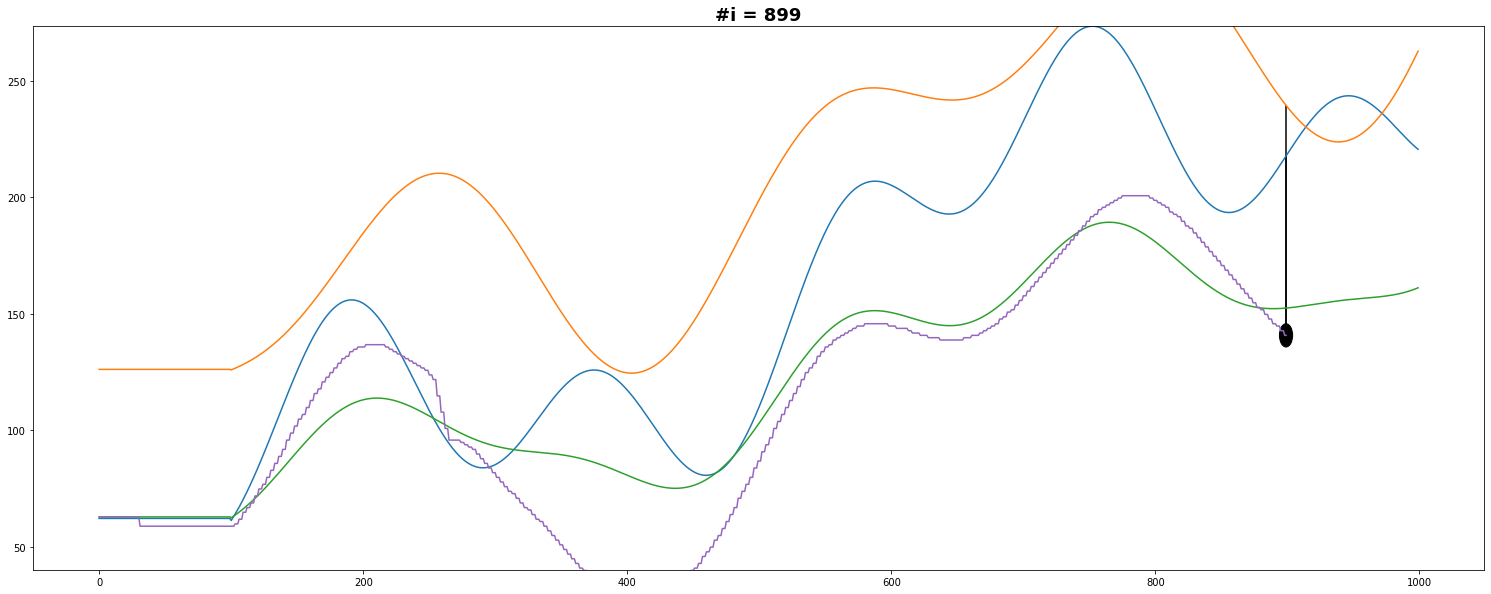

 --------------- plot --------------- 


In [48]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

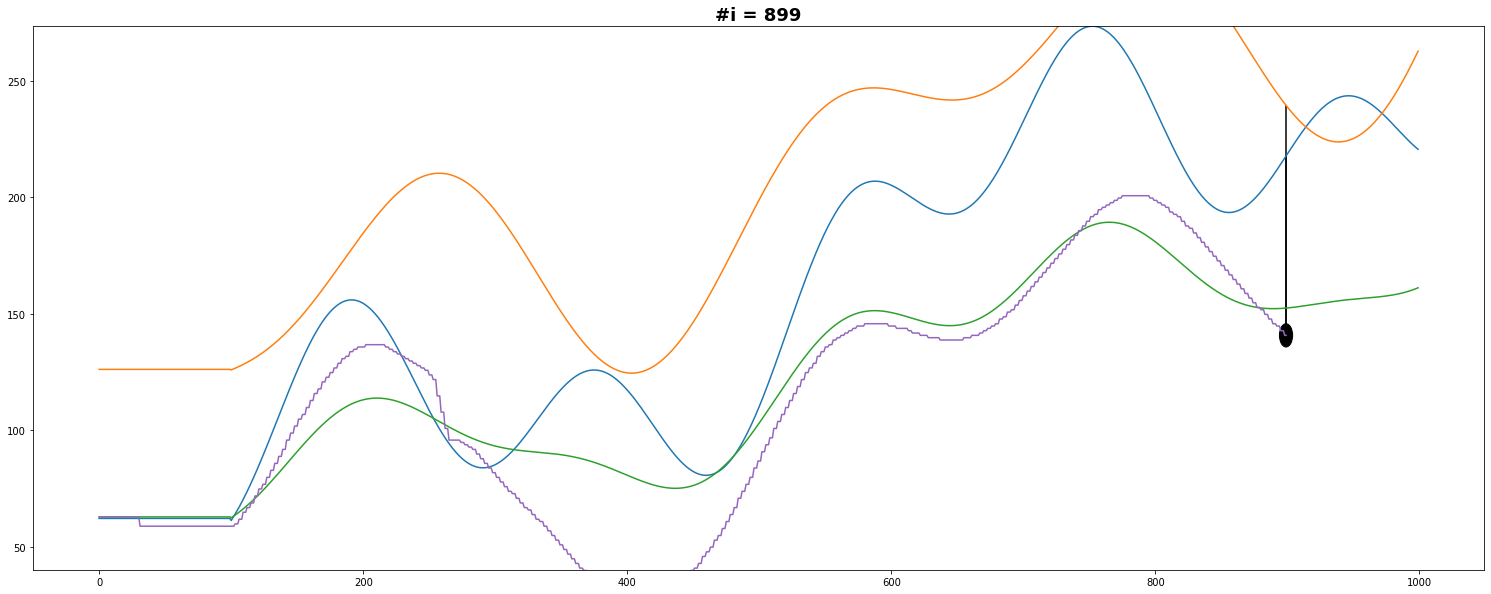

 --------------- plot --------------- 


In [49]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

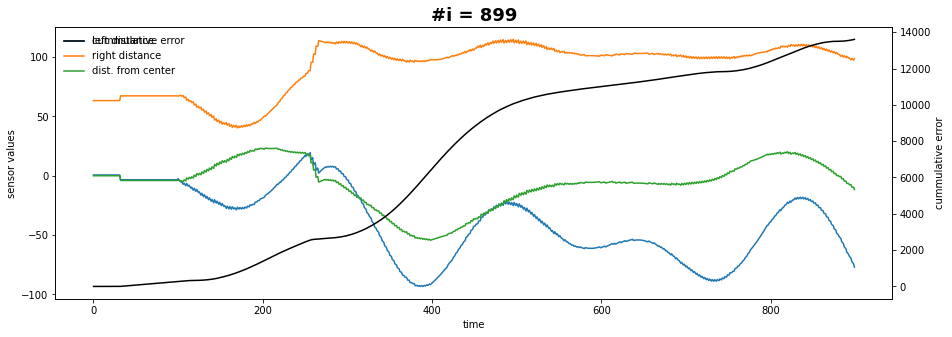

In [50]:
testAuto.plotter.test_plot2(testAuto.sensor_left, testAuto.sensor_right, testAuto.y_distance, testAuto.x, 1, [99])

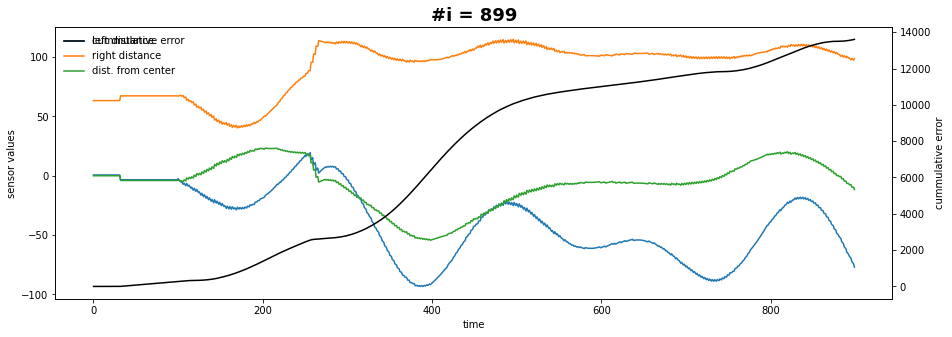

In [51]:
testAuto.plotter.test_plot2(testAuto.sensor_left, testAuto.sensor_right, testAuto.y_distance, testAuto.x, 1, [99])

In [52]:
# cummulativ error utolsó értéke

np.cumsum(np.abs(testAuto.y_distance))[-1]

13606.29553507947

In [53]:
# cummulativ error utolsó értéke

np.cumsum(np.abs(testAuto.y_distance))[-1]

13606.29553507947

In [54]:
# max legnagyobb lépés a futás során

tmp = np.diff(np.array(testAuto.y_history), 1, -1, prepend=0)
tmp[0] = 0
np.array(tmp).max()

4.0

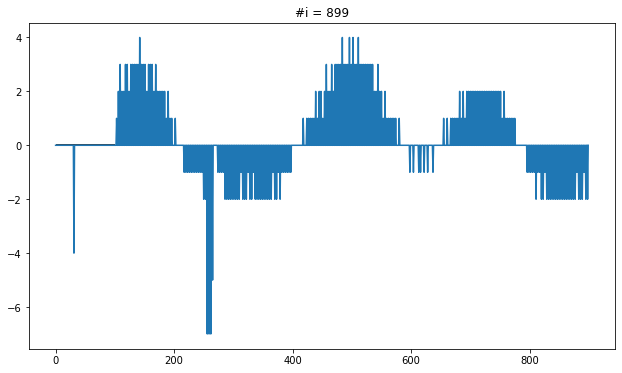

In [55]:
testAuto.plotter.plot_y_move(testAuto.y_history, testAuto.x, 1)

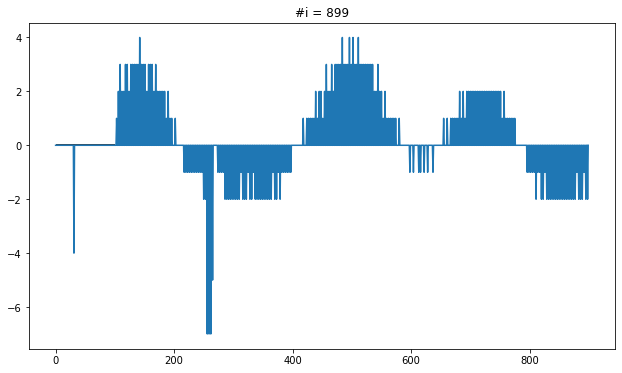

In [56]:
testAuto.plotter.plot_y_move(testAuto.y_history, testAuto.x, 1)

In [57]:
%%capture
! rm images.zip
! zip -0 images.zip *.png

In [58]:
# Csak a Google Colabon használom
# files.download('images.zip')

In [59]:
create_animated_mp4('test_history*.png', 'ani_', framerate=10)

skipped


rm: cannot remove 'ani_test_history.mp4': No such file or directory


In [60]:
%%capture
! zip -0 ani.zip *.mp4

In [61]:
# Csak a Google Colabon használom
# files.download('ani.zip')

<a name="irodalom"></a>

# Felhasznált irodalom és internetes cimek

Itt gyűjtöttem össze a menet közben összegyűjt okosságokat

[vissza a tartalomhoz](#tartalom)<br>

Scikit-learn - MLPRegressor API
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Fogalmak és probléma meghatározás
<br>
https://www.rubrik.com/blog/architecture/20/12/customized-autoscaling--minimize-your-cloud-cost


https://github.com/kubernetes/autoscaler/blob/master/cluster-autoscaler/FAQ.md#what-are-the-parameters-to-ca

https://arxiv.org/pdf/1608.04030.pdf

Metrikák amivel a szollgáltatás minőségét mérik különböző esetekben
<br>
https://blog.avinetworks.com/autoscaling-metrics

------------

NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Python Logger API Reference Guide
<br>
https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook


Python Logger API Tutorial
<br>
https://coralogix.com/blog/python-logging-best-practices-tips


PyPlot Colorbar Tutorial
<br>
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


PyPlot Subplot Tutorial
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html


Scikit Learn ONYX Save model
<br>
http://onnx.ai/sklearn-onnx


Scikit Learn Save Model
<br>
https://stackabuse.com/scikit-learn-save-and-restore-models

------------

Scikit learn API Warm_start and Partial_fit
<br>
https://newbedev.com/what-is-the-difference-between-partial-fit-and-warm-start


Online learning
<br>
https://www.dummies.com/programming/big-data/data-science/tips-for-dealing-with-big-data-in-python/


Online learning
<br>
https://dziganto.github.io/data%20science/online%20learning/python/scikit-learn/An-Introduction-To-Online-Machine-Learning/


------------

Huber Loss
<br>
https://en.wikipedia.org/wiki/Huber_loss


Gradient Descent - van benne egy tök jó animáció - emlékszem amikor az első ilyet írtam 10 éve
<br>
https://en.wikipedia.org/wiki/Gradient_descent


Online Learning
<br>
https://en.wikipedia.org/wiki/Online_machine_learning


Ezen tök jól lehet demonstrálni, hogy miért tanul gyorsan a 'relu', gyorsabban a 'tanh' és lassan a 'logistic' azonos beállítások mellett, habár végül midhárom közel azonos eredményre vezet
<br>
https://playground.tensorflow.org

-------------------

Wow
<br>
https://matplotlib.org/devdocs/gallery/mplot3d/voxels_numpy_logo.html

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2F0FSLf.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=ug0Bk5AvbBFGoM&vet=12ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw..i&docid=lv23pEYcw_qlvM&w=465&h=367&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FvLogW.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=jmhk8RQrADn_iM&vet=12ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ..i&docid=lv23pEYcw_qlvM&w=428&h=352&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FAndrew-Thompson-21%2Fpublication%2F256099533%2Ffigure%2Ffig2%2FAS%3A601596220153863%401520443124187%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A.png&imgrefurl=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A_fig2_256099533&tbnid=PCWbaGIBwOUEqM&vet=12ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ..i&docid=sbOccjnKSDRdPM&w=850&h=1014&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ">Google search</a>

-----------

PyPlot - Memory issue and its solution
<br>
https://www.py4u.net/discuss/208758